# Simple large primes generator
A two-step probalistic algorithm based on Rabin Miller primality test

In [1]:
import random
import math
import matplotlib.pyplot as plt
import typing

## How rare are prime numbers?

In [2]:
def find_primes(limit: int = 100) -> typing.Iterable[int]:
    number = 2

    for i in range(limit):
        isprime = True

        for x in range(2, int(math.sqrt(number) + 1)):
            if number % x == 0: 
                isprime = False
                break

        if isprime:
            yield number

        number += 1

In [3]:
x = [i for i in range(5000)]
y = [len(list(find_primes(j))) for j in range(len(x))]

Text(0, 0.5, 'number of primes up to x')

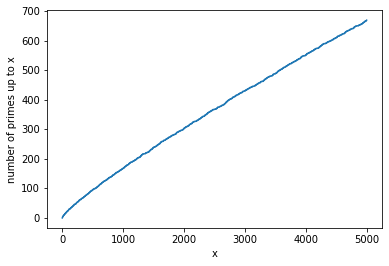

In [4]:
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('number of primes up to x')

### Prime number theorem (PNT)
According to PNT, probability of random $\tilde{p}$ being a prime equals: <br>
$ P(\tilde{p} \, is \, prime) = \dfrac{2}{ln(\tilde{p})} $

## Algorithm

### Step 0
Generate first $n$ primes: $ l = \{l_1, ..., l_n: \forall i \, l_i \, is \, prime\} $

### Step 1 (low level prime)
Generate large integer $\tilde{p}: \tilde{p} \bmod l_i \ne 0 \quad \forall i=1, ..., n $

### Step 2 (high level prime)
Check if prime candidate passes Rabin Miller test. If not repeat from step 1

In [5]:
def generate_first_primes(limit: int = 100) -> typing.Iterable[int]:
    found = 0
    number = 2

    while not found >= limit:
        isprime = True

        for x in range(2, int(math.sqrt(number) + 1)):
            if number % x == 0: 
                isprime = False
                break

        if isprime:
            found += 1
            yield number

        number += 1

In [6]:
def get_low_level_prime(n_bits: int = 1024, n_first_primes: int = 100) -> int:
    first_primes = list(generate_first_primes(n_first_primes))

    def generate_n_bit_random(n_bits: int) -> int:
        number_order = math.ceil(math.log(2**n_bits, 10))
        number = random.randint(10**(number_order - 1), 10**number_order)
        if number % 2 == 0:
            number +=1
        return number

    def is_low_level_prime(number: int) -> bool:
        for prime in first_primes:
            if number % prime == 0:
                return False
        return True

    candidate = generate_n_bit_random(n_bits)
    while not is_low_level_prime(candidate):
        candidate = generate_n_bit_random(n_bits)
    
    return candidate

## [Rabin Miller primality test](https://www.sciencedirect.com/science/article/pii/0022314X80900840?via%3Dihub)
Probalistic primality test

H0: $\tilde{p}$ is **probably** prime <br>
H1: $\tilde{p}$ is **definetely** composite

### Step 1
Find unique $m$ and $k$, where $k$ is the largest, satisfying $ \tilde{p} - 1 = 2^k * m, \quad m, k \in \mathbb{Z} $

### Step 2
Choose random $ a: 1 < a < \tilde{p} $

### Step 3
Find $ b = a^m \bmod \tilde{p} $. If $ b \equiv \pm 1 \bmod \tilde{p} $, then $\tilde{p}$ is probably prime. Else move to step 4

### Step 4
If $ b^{2^r} \equiv -1 \bmod \tilde{p} $ for any $ r: 1 \le r \le k - 1 $, then $\tilde{p}$ if probably prime. Else $\tilde{p}$ is definetely composite

In [7]:
def is_rabin_miller_prime(number: int, iterations: int = 10) -> bool:
    even_component = number - 1
    k = 1

    helper = even_component // 2
    while helper % 2 == 0:
        helper //= 2
        k += 1

    m = even_component // 2**k

    for i in range(iterations):
        a = random.randint(2, number - 1)
        b = pow(a, m, number)
        if b == 1 or b == number - 1:
            continue
        else:
            if k < 1:
                return False
            for r in range(1, k + 1):
                b = pow(b, 2, number)
                if b == number - 1:
                    break
                elif b == 1:
                    return False

    return True

In [8]:
def generate_prime(n_bits: int = 1024,
                   n_first_primes: int = 100,
                   n_rabin_miller_iterations: int = 20) -> int:
    candidate = get_low_level_prime(n_bits, n_first_primes)
    while not is_rabin_miller_prime(candidate, n_rabin_miller_iterations):
        candidate = get_low_level_prime(n_bits, n_first_primes)

    return candidate

In [9]:
generate_prime(1024, 100, 20)

234331975646376171080579096524328671131487210048490262282681539521674757672602122479824453860118796825760155967461241265279367831368172081607243911204789311003085220180950580560122444486372969991590620130270005010660603189941101874702918253779667896077590573771151702304667416727844194583389327777161591537099